### Wstęp do Uczenia Maszynowego 
##### Laboratorium 4

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, precision_score, roc_auc_score, roc_curve

### Zadanie 5
a) Dopasuj model regresji logistycznej do danych `SAheart.data`.

b) Oblicz prawdopodobieństw przynależności do klasy 1 dla zbioru testowego:

  - metodą `decision_function` oraz odwrotnością funkcji logitowej
    
  - metodą `predict_proba`

c) Dokonaj predykcji dla obserwacji o wartości `sbp = 127`, `age = 30`, `alcohol = 0`, `obesity = 25`, `typea = 49`, `famhist = 'Present'`, `tobbaco = 0`, `ldl = 4.44`, `adiposity = 18`.

In [ ]:
SAheart = pd.read_csv("SAheart.data")

In [83]:
SAheart

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


In [84]:
# Zmienna kategoryczna (o dwóch poziomach) jest zmieniana na dwie zmienne binarne (OneHotEnconding)
SAheart = pd.get_dummies(SAheart)
SAheart = SAheart.drop(['row.names'], axis = 1)

# Podział zbioru na X i y
y = SAheart.chd
X = SAheart.drop(['chd'], axis = 1)

# Podział zbioru na train i test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [85]:
# Dopasowanie modelu regresji logistycznej
glm = LogisticRegression(penalty=None, max_iter=300)
glm.fit(X_train, y_train)

LogisticRegression(max_iter=300, penalty=None)

In [86]:
# Współczynniki
glm.coef_

array([[ 1.34875712e-02,  9.17904713e-02,  1.53523822e-01,
         3.30032621e-02,  4.78844913e-02, -6.78076585e-02,
        -1.59703268e-03,  4.52262777e-02, -2.91312429e+00,
        -1.94289471e+00]])

In [87]:
# predict_proba
glm.predict_proba(X_test)[:,1]

array([0.04525328, 0.4638373 , 0.16902394, 0.11858314, 0.32197802,
       0.66623389, 0.35224954, 0.63679853, 0.42761073, 0.48930236,
       0.22478268, 0.33502311, 0.65412966, 0.41556297, 0.11947283,
       0.11447915, 0.27704691, 0.07299929, 0.72034981, 0.22162653,
       0.0786862 , 0.74373992, 0.35132322, 0.1315997 , 0.02727237,
       0.71348972, 0.12163683, 0.02620046, 0.06248327, 0.0214128 ,
       0.81662032, 0.64887951, 0.26658347, 0.03648862, 0.02799551,
       0.17134188, 0.33049672, 0.76186302, 0.03390516, 0.49762907,
       0.60979764, 0.21408161, 0.11773658, 0.06634829, 0.14267221,
       0.1958093 , 0.57474956, 0.62739266, 0.36947471, 0.19433479,
       0.63483107, 0.83812376, 0.65066187, 0.45582546, 0.25540926,
       0.55263058, 0.422617  , 0.14175199, 0.50926744, 0.71571312,
       0.33792171, 0.08087562, 0.74780683, 0.78226687, 0.1000626 ,
       0.30204287, 0.52716913, 0.09827502, 0.10054171, 0.0908947 ,
       0.06744607, 0.44606099, 0.11432957, 0.75308599, 0.08903

In [88]:
# decision_function
1/(1 + np.exp(-glm.decision_function(X_test)))

array([0.04525328, 0.4638373 , 0.16902394, 0.11858314, 0.32197802,
       0.66623389, 0.35224954, 0.63679853, 0.42761073, 0.48930236,
       0.22478268, 0.33502311, 0.65412966, 0.41556297, 0.11947283,
       0.11447915, 0.27704691, 0.07299929, 0.72034981, 0.22162653,
       0.0786862 , 0.74373992, 0.35132322, 0.1315997 , 0.02727237,
       0.71348972, 0.12163683, 0.02620046, 0.06248327, 0.0214128 ,
       0.81662032, 0.64887951, 0.26658347, 0.03648862, 0.02799551,
       0.17134188, 0.33049672, 0.76186302, 0.03390516, 0.49762907,
       0.60979764, 0.21408161, 0.11773658, 0.06634829, 0.14267221,
       0.1958093 , 0.57474956, 0.62739266, 0.36947471, 0.19433479,
       0.63483107, 0.83812376, 0.65066187, 0.45582546, 0.25540926,
       0.55263058, 0.422617  , 0.14175199, 0.50926744, 0.71571312,
       0.33792171, 0.08087562, 0.74780683, 0.78226687, 0.1000626 ,
       0.30204287, 0.52716913, 0.09827502, 0.10054171, 0.0908947 ,
       0.06744607, 0.44606099, 0.11432957, 0.75308599, 0.08903

In [89]:
# Predykcja dla nowej obserwacji 
new_obs = pd.DataFrame({'sbp': [127],
                        'tobacco' : [0], 
                        'ldl' : [4.44],
                        'adiposity' : [18],
                        'typea' : [49],
                        'obesity': [25],
                        'alcohol': [0], 
                        'age': [30],
                        'famhist_Absent': [0],
                        'famhist_Present': [1],
                        })

In [90]:
glm.predict_proba(new_obs)

array([[0.85843485, 0.14156515]])

### Zadanie 6
-----
Weźmy pod uwagę dane `earthquake.csv`, które dotyczą klasyfikacji wstrząsów (zmienna *popn*). Zmienne objaśniające to zmienne *body* i *surface* (zmienne sejsmologiczne).

a) Wykonaj wykres dla zmiennych *body* i *surface* z zaznaczeniem przynależności do klas.

b) Dopasuj modej regresji logistycznej. 

c) Interpretacja współczynników.

In [91]:
earthquake = pd.read_csv("earthquake.txt", sep = " ")

<Axes: xlabel='body', ylabel='surface'>

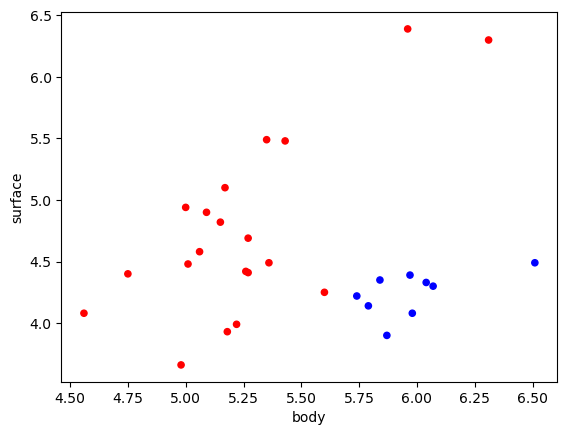

In [92]:
earthquake["color"] = np.where(earthquake["popn"] == "equake", "red", "blue")
earthquake.plot.scatter(x = "body", y = "surface", c = "color")

In [93]:
# Model regresji logistycznej
y = earthquake.popn
X = earthquake.drop(["popn", "color"], axis = 1)

glm = LogisticRegression(penalty=None)
glm.fit(X, y)

LogisticRegression(penalty=None)

In [94]:
glm.coef_

array([[ 146.40894937, -151.81204304]])

In [95]:
glm.intercept_

array([-184.8930899])

##### Laboratorium 5

### Zadanie 1
-----
Wczytaj dane `pima.csv`.

a) Podziel dane za część treningową i testową (3:2).

b) Dopasuj model drzewa do danych treningowych.

c) Dopasuj model regresji logistycznej do danych treningowych.

d) Podaj miary: czułość, precyzja, AUC dla obu modeli na zbiorze testowym.

e) Narysuj krzywą ROC dla obu modeli na zbiorze testowym.

In [96]:
# Wczytanie danych
pima = pd.read_csv("pima.csv")

In [97]:
# Podział na X i y
y = pima.Outcome
X = pima.drop(['Outcome'], axis = 1)

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# Model drzewa bez optymalizacji
tree_default = DecisionTreeClassifier()
tree_default.fit(X_train, y_train)

# Model drzewa
tree = DecisionTreeClassifier(max_depth=7, min_samples_leaf=10)
tree.fit(X_train, y_train)

# Model regresji logistycznej
glm = LogisticRegression(penalty=None, max_iter = 500)
glm.fit(X_train, y_train)

LogisticRegression(max_iter=500, penalty=None)

In [98]:
# Predykcja i wyliczenie metryk
y_pred_tree_default = tree_default.predict(X_test)
y_pred_tree = tree.predict(X_test)
y_pred_glm = glm.predict(X_test)

print("Model DRZEWA DEFAULT")
print("---------------------------")
print("precision:", np.round(precision_score(y_test, y_pred_tree_default), 3))
print("recall:", np.round(recall_score(y_test, y_pred_tree_default), 3))

print("Model DRZEWA")
print("---------------------------")
print("precision:", np.round(precision_score(y_test, y_pred_tree), 3))
print("recall:", np.round(recall_score(y_test, y_pred_tree), 3))

print("Model REGRESJI LOGISTYCZNEJ")
print("---------------------------")
print("precision", np.round(precision_score(y_test, y_pred_glm), 3))
print("recall:", np.round(recall_score(y_test, y_pred_glm), 3))


Model DRZEWA DEFAULT
---------------------------
precision: 0.598
recall: 0.587
Model DRZEWA
---------------------------
precision: 0.637
recall: 0.625
Model REGRESJI LOGISTYCZNEJ
---------------------------
precision 0.764
recall: 0.529


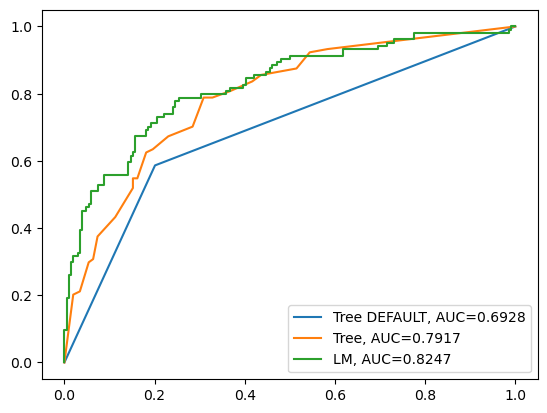

In [99]:
# AUC i krzywa ROC
pred_tree_default = tree_default.predict_proba(X_test)
pred_tree = tree.predict_proba(X_test)
pred_glm = glm.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, pred_tree_default[:,1])
plt.plot(fpr,tpr,label="Tree DEFAULT, AUC="+str(round(roc_auc_score(y_test, pred_tree_default[:,1]), 4)))
fpr, tpr, thresholds = roc_curve(y_test, pred_tree[:,1])
plt.plot(fpr,tpr,label="Tree, AUC="+str(round(roc_auc_score(y_test, pred_tree[:,1]), 4)))
fpr, tpr, thresholds = roc_curve(y_test, pred_glm[:,1])
plt.plot(fpr,tpr,label="LM, AUC="+str(round(roc_auc_score(y_test, pred_glm[:,1]), 4)))
plt.legend()

### Zadanie 2
-----
Eksperyment symulacyjny. Wygenerujmy dane w następujący sposób. Niech $n = 200$, $p = 5$. Wektor $\beta_0 = 1$, $\beta_1 = [2, 1, 0.5, 0.01, 0]$, $x_i \sim N_p(0, I)$ dla $i = 1,2, \dots, n$. $y_i$ pochodzi z rozkładu $Bern(p_i)$, gdzie $p_i=\frac{exp(\beta_0 + x_{i\cdot}\beta_1)}{1 + exp(\beta_0 + x_{i\cdot}\beta_1)}$.

a) Dopasuj model regresji logistycznej. Porównaj prawdziwe wartości wektora $\beta$ z wyestymowanymi.

b) Dopasuj model regresji logistycznej z regularyzacją $L2$ i współczynnikami $C = (10, 5, 2, 1, 0.5, 0.1, 0.01, 0.005)$. jak zmienieją się współczynniki wraz ze wzrostem współczynnika lambda?

c) Dopasuj model regresji logistycznej z regularyzacją $L1$ i współczynnikami $C = (10, 5, 2, 1, 0.5, 0.1, 0.01, 0.005)$. jak zmienieją się współczynniki wraz ze wzrostem współczynnika lambda?

d) Powtórz eksperyment 500 razy dla modelu logistycznego bez regularyzacji, z regularyzacją $L2$ i parametrem $C=1$ i regularyzacją $L1$ i parametrem $C=1$. Oblicz MSE.

In [100]:
# Symulacja danych wejściowych
n = 200
p = 5
beta_0 = 1
beta_1 = np.array([2, 1, 0.5, 0.01, 0])
X = np.random.normal(0, 1, size = (n, p))
Xbeta = X@beta_1 + beta_0
probs = np.exp(Xbeta)/(1 + np.exp(Xbeta))
y = np.random.binomial(1, probs)


In [101]:
# a)
lm = LogisticRegression(penalty=None)
lm.fit(X, y)
print(lm.coef_)
print(lm.intercept_)

[[1.92302947 1.2127164  0.50560751 0.45169362 0.14747978]]
[0.8126997]


In [102]:
# b) 
coefs = []
intercepts = []
C = np.array([10, 5, 2, 1, 0.5, 0.1, 0.01, 0.005])

for c in C:
    glm = LogisticRegression(penalty="l2", C = c)
    glm.fit(X, y)
    coefs.append(glm.coef_[0])
    intercepts.append(glm.intercept_[0])

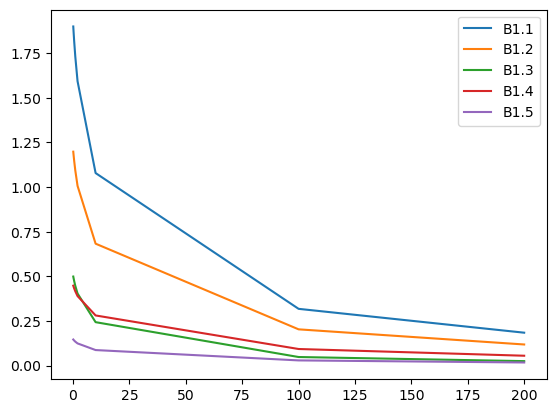

In [103]:
plt.plot(1/C, np.array(coefs), label = ['B1.1', 'B1.2', 'B1.3', 'B1.4', 'B1.5'])
plt.legend()

In [104]:
# c) 
coefs = []
intercepts = []
C = np.array([10, 5, 2, 1, 0.5, 0.1, 0.01, 0.005])

for c in C:
    glm = LogisticRegression(penalty="l1", C = c, solver = 'liblinear')
    glm.fit(X, y)
    coefs.append(glm.coef_[0])
    intercepts.append(glm.intercept_[0])

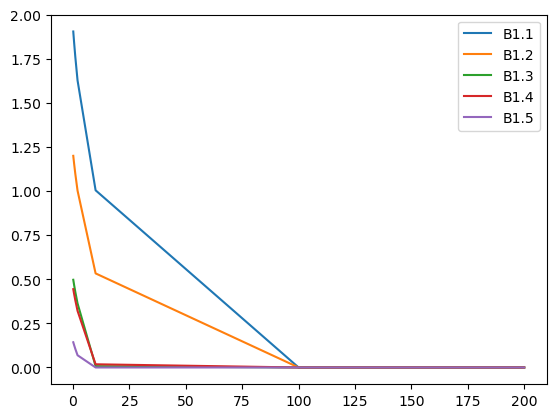

In [105]:
plt.plot(1/C, np.array(coefs), label = ['B1.1', 'B1.2', 'B1.3', 'B1.4', 'B1.5'])
plt.legend()